##kears를 이용한 이미지 CNN

In [15]:
import numpy as np

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D # pooling 중에서 큰 값을 선택하겠다는 것
from keras.layers import Flatten # 겹겹히 쌓인 층을 한 줄로 평평하게 만들겠다는 것
from keras.layers import Dense,LSTM

In [ ]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

##loss에 뭐뭐를 넣을수 있는지 알아보기,optimizer 종류 알아보기
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

In [ ]:
!ls /Users/quartz/data/collabo/train/

In [ ]:
from keras.preprocessing.image import ImageDataGenerator # Package for Keras Image Preprocessing

train_datagen = ImageDataGenerator(rescale = 1./255, ##왜 255로 나누는지
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255) ##왜 255로 나누는지

training_set = train_datagen.flow_from_directory('/Users/quartz/data/collabo/train/', ##경로 넣기. 하위 폴더에 1, 0에 해당하는 폴더를 하나씩 만들어서 학습, 예측한다.
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/Users/quartz/data/collabo/valid/', ##경로 넣기
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         steps_per_epoch = 100, # 1 epochs 당 연산량 300 -> 100
                         epochs = 5, # 총 epochs 횟수 25 -> 5
                         validation_data = test_set,
                         validation_steps = 2000)


In [ ]:
output = classifier.predict_generator(test_set, steps=5)
print(test_set.class_indices)
print(output)


## Keras를 이용한 RNN

In [11]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [17]:
code2idx

{'c4': 0,
 'd4': 1,
 'e4': 2,
 'f4': 3,
 'g4': 4,
 'a4': 5,
 'b4': 6,
 'c8': 7,
 'd8': 8,
 'e8': 9,
 'f8': 10,
 'g8': 11,
 'a8': 12,
 'b8': 13}

In [19]:
def seq2dataset(seq, window_size): ##어떤 역할을 하는지 생각해보기. 윈도우 사이즈에 따라 데이터셋을 재구성
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [20]:
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)
print(dataset)

(50, 5)
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 11]
 [ 9 10 11 11  4]
 [10 11 11  4 11]
 [11 11  4 11  9]
 [11  4 11  9  9]
 [ 4 11  9  9  9]
 [11  9  9  9 10]
 [ 9  9  9 10  8]
 [ 9  9 10  8  1]
 [ 9 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]
 [11  9  9  2  8]
 [ 9  9  2  8  8]
 [ 9  2  8  8  8]
 [ 2  8  8  8  8]
 [ 8  8  8  8  8]
 [ 8  8  8  8  9]
 [ 8  8  8  9  3]
 [ 8  8  9  3  9]
 [ 8  9  3  9  9]
 [ 9  3  9  9  9]
 [ 3  9  9  9  9]
 [ 9  9  9  9  9]
 [ 9  9  9  9 10]
 [ 9  9  9 10  4]
 [ 9  9 10  4 11]
 [ 9 10  4 11  9]
 [10  4 11  9  2]
 [ 4 11  9  2 10]
 [11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]]


In [59]:
from keras.utils import np_utils
import keras

x_train = dataset[:,0:4] # 0 ~ 4. 속성의 개수가 아닌 윈도우 사이즈의 개수.
y_train = dataset[:,4] #
max_idx_value=13

x_train = x_train / float(max_idx_value)
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]
print('one hot encoding vector size is',one_hot_vec_size)

model= Sequential()
model.add(Dense(128,input_dim=4,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(one_hot_vec_size,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

one hot encoding vector size is 12


In [60]:
# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        
print("one hot encoding vector size is ", one_hot_vec_size)
        
history = LossHistory() 
history.init()

model.fit(x_train, y_train, epochs=200, batch_size=10, verbose=2, shuffle=False, callbacks=[history])

one hot encoding vector size is  12
Epoch 1/200
 - 0s - loss: 2.5091 - acc: 0.0400
Epoch 2/200
 - 0s - loss: 2.3934 - acc: 0.2600
Epoch 3/200
 - 0s - loss: 2.3044 - acc: 0.3400
Epoch 4/200
 - 0s - loss: 2.2234 - acc: 0.3400
Epoch 5/200
 - 0s - loss: 2.1469 - acc: 0.3400
Epoch 6/200
 - 0s - loss: 2.0774 - acc: 0.3400
Epoch 7/200
 - 0s - loss: 2.0198 - acc: 0.3400
Epoch 8/200
 - 0s - loss: 1.9764 - acc: 0.3400
Epoch 9/200
 - 0s - loss: 1.9451 - acc: 0.3400
Epoch 10/200
 - 0s - loss: 1.9205 - acc: 0.3400
Epoch 11/200
 - 0s - loss: 1.8984 - acc: 0.3400
Epoch 12/200
 - 0s - loss: 1.8789 - acc: 0.3400
Epoch 13/200
 - 0s - loss: 1.8626 - acc: 0.3400
Epoch 14/200
 - 0s - loss: 1.8486 - acc: 0.3400
Epoch 15/200
 - 0s - loss: 1.8356 - acc: 0.3400
Epoch 16/200
 - 0s - loss: 1.8228 - acc: 0.3400
Epoch 17/200
 - 0s - loss: 1.8107 - acc: 0.3400
Epoch 18/200
 - 0s - loss: 1.7989 - acc: 0.3400
Epoch 19/200
 - 0s - loss: 1.7873 - acc: 0.3400
Epoch 20/200
 - 0s - loss: 1.7755 - acc: 0.3400
Epoch 21/200


/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1329: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1329: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1329: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1329: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1329: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling ba

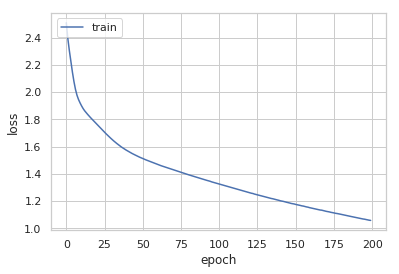

In [63]:
plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [64]:
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 2ms/step
acc: 58.00%


In [68]:
x_train.shape

(50, 4)

In [69]:
pred_count = 50 # 최대 예측 개수 정의

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

In [72]:
np.argmax(pred_out[0])

8

In [73]:
for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'g8', 'g8', 'e8', 'e8', 'e8', 'g8', 'e8', 'd4', 'e8', 'e4', 'e8', 'e8', 'c8', 'd8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'g8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'g8', 'e8', 'd4', 'c8', 'd8', 'd4', 'c8', 'd8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [74]:
# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

In [76]:
seq_out, seq_in

(['g8', 'e8', 'e4', 'f8'],
 [0.8461538461538461,
  0.6923076923076923,
  0.15384615384615385,
  0.7692307692307693])

In [77]:
for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in,(1,4)) #batch_size,속성수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'e8', 'e8', 'g8', 'e8', 'e8', 'e8', 'e4', 'g8', 'e8', 'd4', 'c8', 'd8', 'e8', 'g8', 'e8', 'e8', 'e8', 'e4', 'g8', 'e8', 'd4', 'c8', 'd8', 'e8', 'g8', 'e8', 'e8', 'e8', 'e4', 'g8', 'e8', 'd4', 'c8', 'd8', 'e8', 'g8', 'e8', 'e8', 'e8', 'e4']


##Keras를 이용한 상태유지 LSTM

In [ ]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [ ]:
import numpy as np

def seq2dataset(seq, window_size):##어떤 역할을 하는지 생각해보기
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [ ]:
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)
print(dataset)

In [ ]:
x_train=dataset[:,0:4]
y_train=dataset[:,4]
max_idx_value=13

In [ ]:
x_train = x_train / float(max_idx_value)

In [ ]:
x_train = np.reshape(x_train,(50,4,1))

In [ ]:
y_train=np_utils.to_categorical(y_train)

In [ ]:
one_hot_vec_size=y_train.shape[1]

In [ ]:
model = Sequential()
model.add(LSTM(128, batch_input_shape=(1,4,1), stateful=True))##batch_input_size (배치사이즈,타임스텝,속성)
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [ ]:
# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

print("one hot encoding vector size is ", one_hot_vec_size)


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = LossHistory() 
history.init()

num_epoch=200

for epoch_idx in range(num_epoch):
    print('epochs:'+str(epoch_idx))
    model.fit(x_train,y_train,epochs=1,batch_size=1,verbose=2,shuffle=False,callbacks=[history])
    model.reset_states()##상태 초기화에 대한 코드

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

scores = model.evaluate(x_train, y_train,batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))


pred_count = 50 # 최대 예측 개수 정의


seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train,batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4,1)) # 샘플수,타임스템수,속성수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)